### Библиотеки и датасет

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, r2_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.decomposition import PCA

# Загрузка датасета из UCI Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, sep=';')

X = wine_data.drop(columns='quality')
y_classification = wine_data['quality']
y_regression = wine_data['alcohol']  # Используем содержание алкоголя для регрессии

### Разделение на выборки

In [2]:
# Разделение данных на обучающую и тестовую выборки для классификации
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_classification, test_size=0.3, random_state=42)

# Разделение данных на обучающую и тестовую выборки для регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.3, random_state=42)

### Обучение моделей

In [3]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_cls, y_train_cls)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

### Оценка качества моделей

In [4]:
y_pred_cls = rf_classifier.predict(X_test_cls)
classification_accuracy = accuracy_score(y_test_cls, y_pred_cls)
print("Accuracy (Classification):", classification_accuracy)
print("Classification Report:\n", classification_report(y_test_cls, y_pred_cls))

y_pred_reg = rf_regressor.predict(X_test_reg)
regression_mse = mean_squared_error(y_test_reg, y_pred_reg)
regression_r2 = r2_score(y_test_reg, y_pred_reg)
print("MSE (Regression):", regression_mse)
print("R2 Score (Regression):", regression_r2)

Accuracy (Classification): 0.6541666666666667
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.72      0.75      0.73       195
           6       0.62      0.69      0.65       200
           7       0.56      0.46      0.50        61
           8       0.50      0.17      0.25         6

    accuracy                           0.65       480
   macro avg       0.40      0.34      0.36       480
weighted avg       0.63      0.65      0.64       480

MSE (Regression): 0.00015585393518516345
R2 Score (Regression): 0.9998661839917631


c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### Подбор гиперпараметров

In [5]:
param_grid_cls = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_cls = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_cls, cv=5, scoring='accuracy')
grid_search_cls.fit(X_train_cls, y_train_cls)

param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg, y_train_reg)

best_rf_classifier = grid_search_cls.best_estimator_
best_rf_regressor = grid_search_reg.best_estimator_


### Обучение модели с улучшенным бейзлайном + результаты

In [6]:
best_rf_classifier.fit(X_train_cls, y_train_cls)
best_rf_regressor.fit(X_train_reg, y_train_reg)

y_pred_cls_best = best_rf_classifier.predict(X_test_cls)
best_classification_accuracy = accuracy_score(y_test_cls, y_pred_cls_best)
print("Improved Accuracy (Classification):", best_classification_accuracy)
print("Improved Classification Report:\n", classification_report(y_test_cls, y_pred_cls_best))

y_pred_reg_best = best_rf_regressor.predict(X_test_reg)
best_regression_mse = mean_squared_error(y_test_reg, y_pred_reg_best)
best_regression_r2 = r2_score(y_test_reg, y_pred_reg_best)
print("Improved MSE (Regression):", best_regression_mse)
print("Improved R2 Score (Regression):", best_regression_r2)


Improved Accuracy (Classification): 0.65625
Improved Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.72      0.76      0.74       195
           6       0.62      0.69      0.65       200
           7       0.55      0.46      0.50        61
           8       1.00      0.17      0.29         6

    accuracy                           0.66       480
   macro avg       0.48      0.35      0.36       480
weighted avg       0.63      0.66      0.64       480

Improved MSE (Regression): 0.00015116221064812393
Improved R2 Score (Regression): 0.9998702123010166


c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sad type\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

### Визуализация результатов

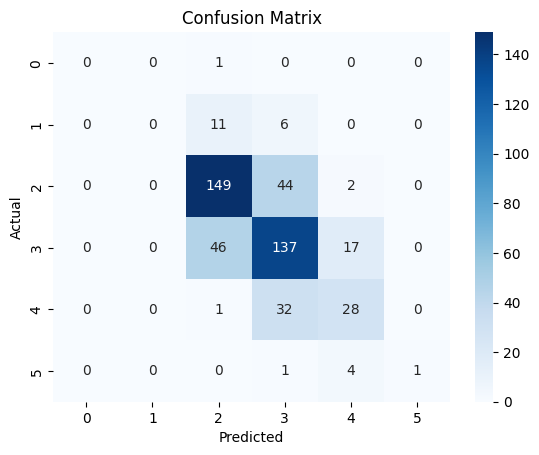

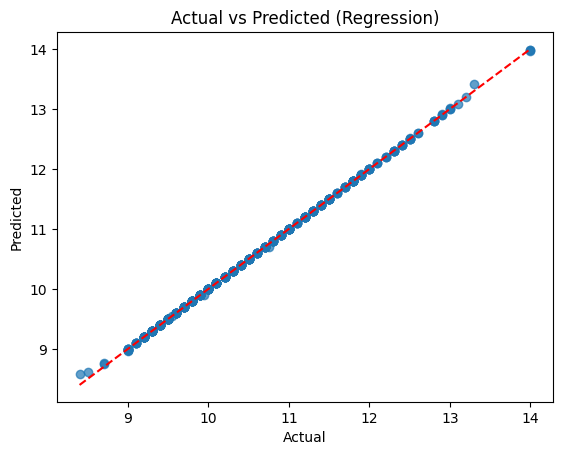

In [7]:
conf_matrix = confusion_matrix(y_test_cls, y_pred_cls_best)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# График реальных и предсказанных значений для регрессии
plt.scatter(y_test_reg, y_pred_reg_best, alpha=0.7)
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.title("Actual vs Predicted (Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Имплементация алгоритма случайного леса вручную

In [18]:
class RandomForestManual:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            bootstrap_X, bootstrap_y = self._bootstrap(X, y)
            tree.fit(bootstrap_X, bootstrap_y)
            self.trees.append(tree)

    def fit_reg(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            bootstrap_X, bootstrap_y = self._bootstrap(X, y)
            tree.fit(bootstrap_X, bootstrap_y)
            self.trees.append(tree)

    def _bootstrap(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(range(n_samples), size=n_samples, replace=True)
        return X.iloc[indices], y.iloc[indices]

    def predict(self, X, classification=True):
        tree_preds = np.zeros((X.shape[0], self.n_estimators))
        for i, tree in enumerate(self.trees):
            tree_preds[:, i] = tree.predict(X)
        if classification:
            return [np.bincount(tree_preds[i, :].astype(int)).argmax() for i in range(tree_preds.shape[0])]
        else:
            return np.mean(tree_preds, axis=1)

### Обучение + результаты

Manual Random Forest Accuracy (Classification): 0.6416666666666667
Manual Random Forest MSE (Regression): 0.00021410295138888974
Manual Random Forest R2 Score (Regression): 0.9998161714539158


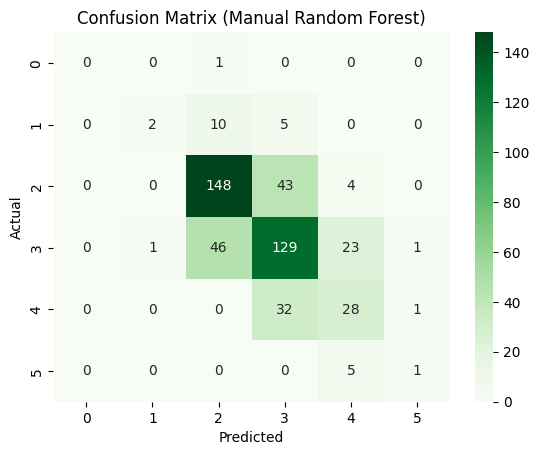

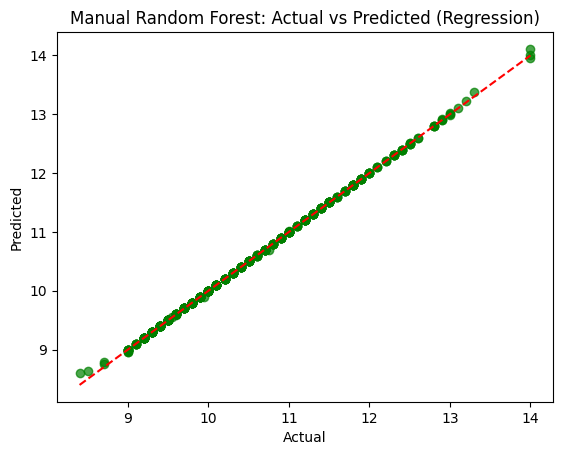

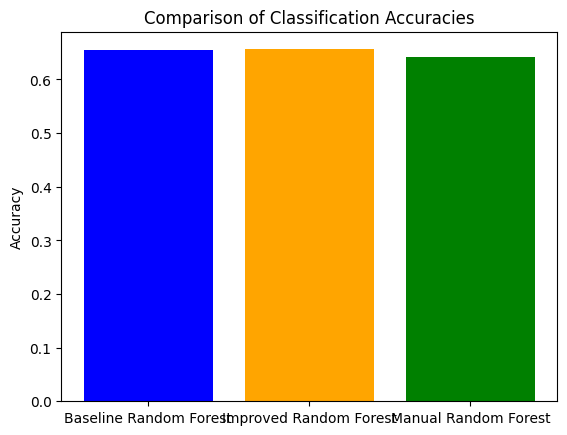

In [20]:
# Применение имплементированного случайного леса
rf_manual_cls = RandomForestManual(n_estimators=100)
rf_manual_cls.fit(X_train_cls, y_train_cls)
y_pred_manual_cls = rf_manual_cls.predict(X_test_cls)
manual_accuracy = accuracy_score(y_test_cls, y_pred_manual_cls)
print("Manual Random Forest Accuracy (Classification):", manual_accuracy)

rf_manual_reg = RandomForestManual(n_estimators=100)
rf_manual_reg.fit_reg(X_train_reg, y_train_reg)
y_pred_manual_reg = rf_manual_reg.predict(X_test_reg, classification=False)

manual_regression_mse = mean_squared_error(y_test_reg, y_pred_manual_reg)
manual_regression_r2 = r2_score(y_test_reg, y_pred_manual_reg)
print("Manual Random Forest MSE (Regression):", manual_regression_mse)
print("Manual Random Forest R2 Score (Regression):", manual_regression_r2)

# Визуализация результатов для ручной имплементации
conf_matrix_manual = confusion_matrix(y_test_cls, y_pred_manual_cls)
sns.heatmap(conf_matrix_manual, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Manual Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

plt.scatter(y_test_reg, y_pred_manual_reg, alpha=0.7, color='green')
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color='red', linestyle='--')
plt.title("Manual Random Forest: Actual vs Predicted (Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

# Сравнение точности моделей
accuracies = [classification_accuracy, best_classification_accuracy, manual_accuracy]
labels = ['Baseline Random Forest', 'Improved Random Forest', 'Manual Random Forest']
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.title("Comparison of Classification Accuracies")
plt.ylabel("Accuracy")
plt.show()